In [2]:
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import h5py
import sys
from matplotlib import cm
import matplotlib
%matplotlib inline

!pip install cmcrameri
from cmcrameri import cm

In [158]:
sys.path.append('/users/marianne/documents/data/reanalysis/')
filepath = '/users/marianne/documents/data/reanalysis/'

In [10]:
os.chdir('/users/marianne/documents/pe_snow_fires/')
sn_watersheds= gpd.read_file('data/sn_watersheds.shp')
hf = h5py.File(filepath + 'SN_SWE_WY1990.h5', 'r')
swe = hf.get('SWE')
lat = hf.get('lat')
lon = hf.get('lon')

In [62]:
swe_april1 = np.array(swe[183,:,:])
swe_april1[swe_april1<0]=-1

In [ ]:
# plot max SWE for a water year

# get the PE map for that year

# divide them

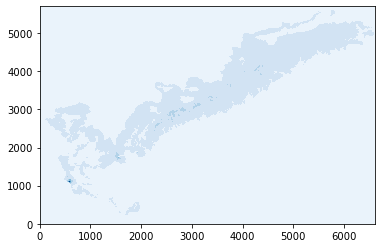

In [24]:
plt.contourf(swe_april1[:,:],cmap = newcmp)

In [58]:
blues = cm.get_cmap('Blues', 256)
newcolors = blues(np.linspace(0, 1, 256))
white = np.array([1,1,1,0])
newcolors[:10, :] = white
newcmp = matplotlib.colors.ListedColormap(newcolors)

In [63]:
swe_april1 = swe_april1.astype(float)
swe_april1[swe_april1<0]=np.nan

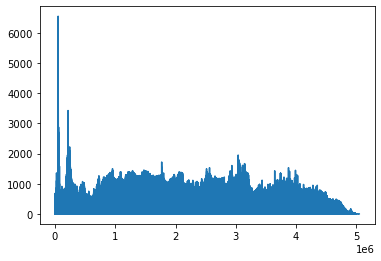

In [80]:
plt.plot(tmp)

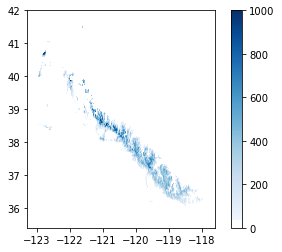

In [72]:
fig,ax=plt.subplots()
im = ax.imshow(swe_april1,cmap=newcmp,vmin=0,vmax=1000,
                            extent=(np.nanmin(lon),
                            np.nanmax(lon),
                            np.nanmin(lat),
                            np.nanmax(lat)))
fig.colorbar(im,ax=ax)
plt.show()

In [102]:
# tmp=tmp[np.where(tmp>0 & tmp<2000]
days = range(90,200,10)
data1990 = {}
for i in days:
    tmp = np.array(swe[i,:,:]).flatten()
    tmp = tmp[np.where((tmp>0) & (tmp<2000))]
    data1990[i]=tmp


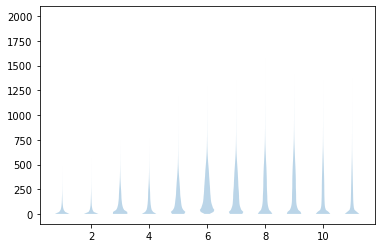

In [121]:
fig,ax=plt.subplots()
alldata = [data1990[i] for i in days]

ax.violinplot(alldata,showextrema=False)
plt.show()

In [118]:
data1990.keys()

dict_keys([90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190])

C:\Users\Marianne\anaconda3\envs\swe\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

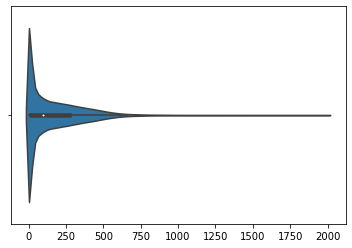

In [115]:
import seaborn as sns
sns.violinplot(tmp)

{'bodies': [<matplotlib.collections.PolyCollection at 0x260c8d790c8>]}

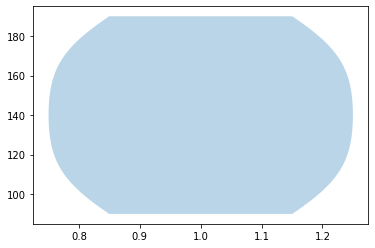

In [103]:
plt.violinplot(data1990,showextrema=False)

In [159]:

days = range(90,200,10)
for yr in range(1985,2017):
    hf = h5py.File(filepath + 'SN_SWE_WY'+str(yr)+ '.h5', 'r')
    swe = hf.get('SWE')
    lat = hf.get('lat')
    lon = hf.get('lon')
    data = {}
    for i in days:
        tmp = np.array(swe[i,:,:]).flatten()
        tmp = tmp[np.where((tmp>0) & (tmp<2000))]
        data[i]=tmp
    np.save('data'+str(yr)+'.npy',data,allow_pickle=True)


In [160]:
april1swe = {}

for yr in range(1985,2017):
    file = 'data'+str(yr)+'.npy'
    data =np.load(file,allow_pickle=True).reshape((1))[0]
    fig,ax=plt.subplots()
    tmp = [data[i] for i in days]
    ax.boxplot(tmp)
    fig.savefig('boxplot'+str(yr)+'.jpg')
    plt.close()
    fig,ax=plt.subplots()
    ax.violinplot(tmp,showextrema=False)
    fig.savefig('violin'+str(yr)+'.jpg')
    plt.close()
    april1swe[yr] = data[180]



fig,ax=plt.subplots()
ax.boxplot(april1swe)
fig.savefig('april1swe.jpg')
plt.close()



AttributeError: 'AxesSubplot' object has no attribute 'plt'

KeyboardInterrupt: 

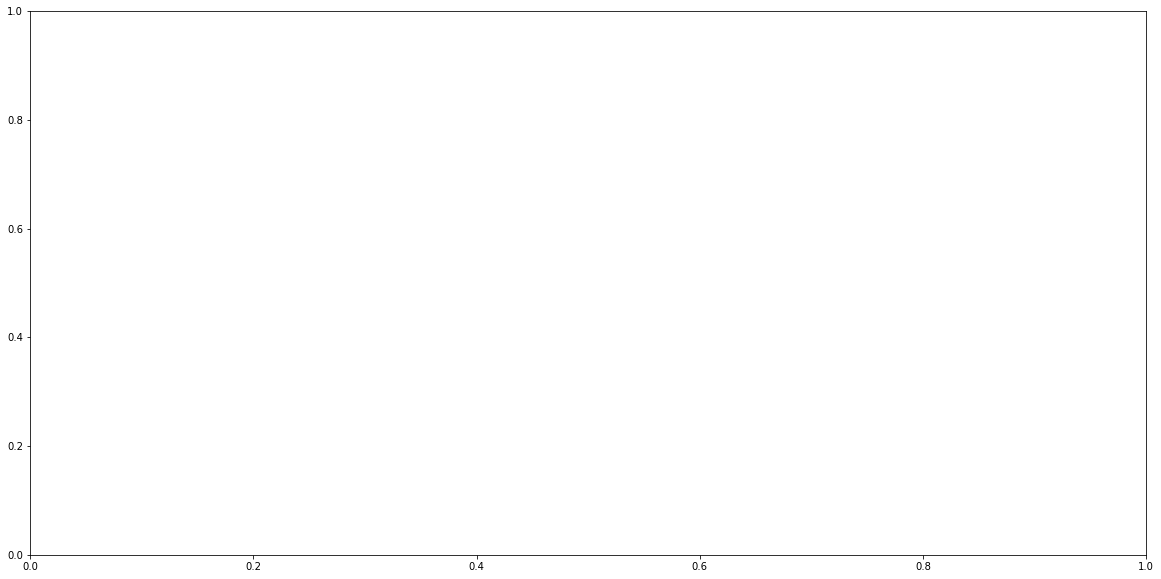

In [166]:
fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
ax.violinplot(tmp,showextrema=False)
fig.savefig('april1swe_violin.jpg')
plt.close()

{'whiskers': [<matplotlib.lines.Line2D at 0x26132e3d888>,
 'caps': [<matplotlib.lines.Line2D at 0x262a5245b48>,
 'boxes': [<matplotlib.lines.Line2D at 0x262a5245488>,
 'medians': [<matplotlib.lines.Line2D at 0x262a5218dc8>,
 'fliers': [],
 'means': []}

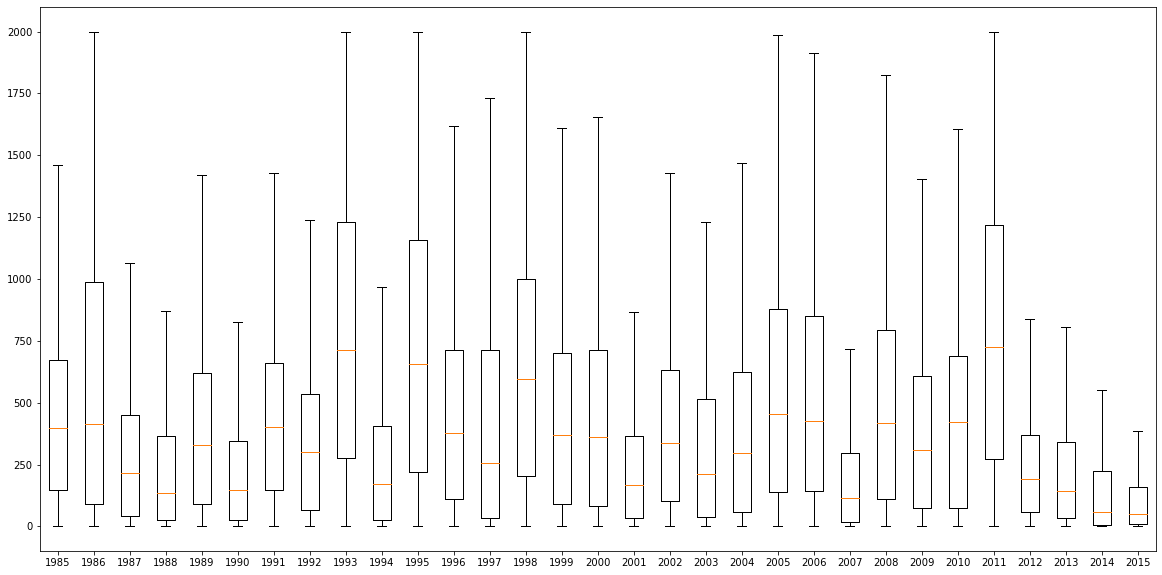

In [168]:
fig,ax = plt.subplots(figsize=(20,10))
tmp = [april1swe[i] for i in range(1985,2016)]
ax.boxplot(tmp,showfliers=False,positions=range(1985,2016))
# fig.savefig('april1swe.jpg')
# plt.close()

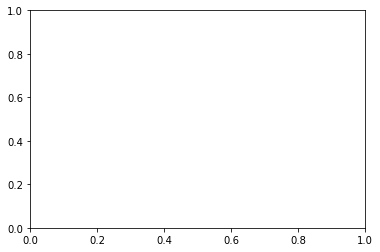

In [154]:
fig,ax=plt.subplots()
#test2 = [test[i] for i in days]
# ax.violinplot(test2,showextrema=False)
plt.show()
plt.close()

range(90, 200, 10)